# Import the libraries

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from collections import Counter

# checking the device

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Hyperparameters

In [17]:
input_size = 784  # 28x28 images
hidden_size = 128
num_classes = 10  # 10 digits (0-9)
num_epochs = 10
batch_size = 64
learning_rate = 0.001


# Transformations and Dataset Preparation

In [18]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [19]:
print(transform)

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)


In [20]:
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

print(train_dataset)
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [21]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

print(train_loader)

# Count the number of images in each class

In [22]:
train_labels_count = Counter(train_dataset.targets.numpy())
test_labels_count = Counter(test_dataset.targets.numpy())


In [23]:
print("Number of images in training dataset:", len(train_dataset))
print("Number of images in testing dataset:", len(test_dataset))
print("Class distribution in training dataset:")
for label, count in train_labels_count.items():
    print(f"Class {label}: {count} images")


Number of images in training dataset: 60000
Number of images in testing dataset: 10000
Class distribution in training dataset:
Class 5: 5421 images
Class 0: 5923 images
Class 4: 5842 images
Class 1: 6742 images
Class 9: 5949 images
Class 2: 5958 images
Class 3: 6131 images
Class 6: 5918 images
Class 7: 6265 images
Class 8: 5851 images


# Defining the ANN model

In [24]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.norm1 = nn.BatchNorm1d(hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.norm2 = nn.BatchNorm1d(hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.norm3 = nn.BatchNorm1d(hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.norm4 = nn.BatchNorm1d(hidden_size)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten the images
        x = self.fc1(x)
        x = self.norm1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.norm2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.norm3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.norm4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        return x

model = ANN(input_size, hidden_size, num_classes).to(device)


In [25]:
print(model)

ANN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (norm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (norm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (norm3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=128, out_features=128, bias=True)
  (norm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=128, out_features=10, bias=True)
)


# Loss and Optimizer

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [27]:
print(criterion)
print(optimizer)

CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


# Training Loop

In [28]:
print("Training the model...")
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")


Training the model...
Epoch [1/10], Loss: 0.0846
Epoch [2/10], Loss: 0.0989
Epoch [3/10], Loss: 0.1139
Epoch [4/10], Loss: 0.0030
Epoch [5/10], Loss: 0.0199
Epoch [6/10], Loss: 0.1669
Epoch [7/10], Loss: 0.1094
Epoch [8/10], Loss: 0.0476
Epoch [9/10], Loss: 0.2223
Epoch [10/10], Loss: 0.0273


# Testing Loop

In [29]:
print("Evaluating the model...")
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.4f}%")

Evaluating the model...
Test Accuracy: 98.1900%


# Saving the Model

In [30]:
torch.save(model.state_dict(), "mnist_ann.pth")
print("Model saved as mnist_ann.pth")


Model saved as mnist_ann.pth


# Per class Accuracy

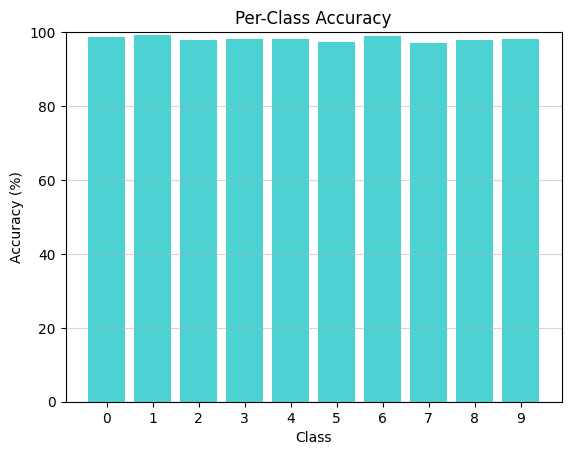

In [31]:
class_correct = [0] * num_classes
class_total = [0] * num_classes

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(labels)):
            label = labels[i].item()
            class_correct[label] += (predicted[i] == labels[i]).item()
            class_total[label] += 1

# Calculate and plot per-class accuracy
class_accuracy = [100 * c / t if t != 0 else 0 for c, t in zip(class_correct, class_total)]
plt.bar(range(num_classes), class_accuracy, color='c', alpha=0.7)
plt.title("Per-Class Accuracy")
plt.xlabel("Class")
plt.ylabel("Accuracy (%)")
plt.xticks(range(num_classes), labels=range(num_classes))
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.5)
plt.show()


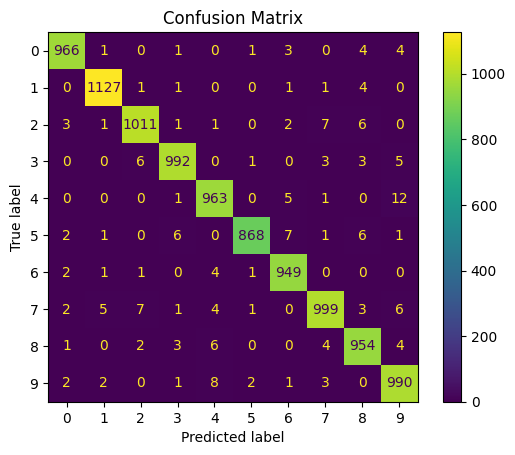

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
all_preds = []
all_labels = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()


# Loss vs. Epochs

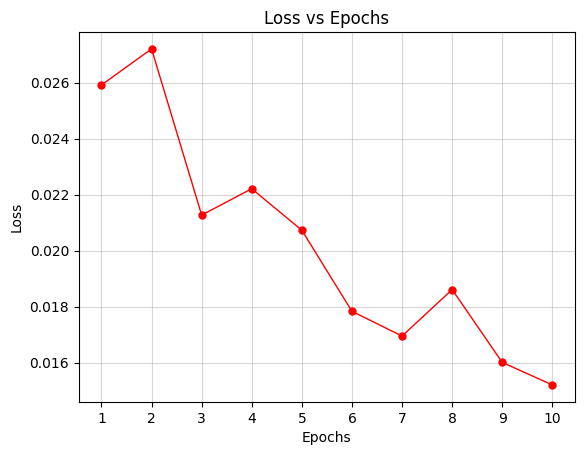

In [34]:
# Track loss during training
loss_list = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    loss_list.append(epoch_loss / len(train_loader))  # Average loss per epoch

# Plot Loss vs. Epochs
plt.plot(range(1, num_epochs + 1), loss_list, marker='o', linestyle='-', linewidth=1, markersize=5, color='r')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.5)
plt.xticks(range(1, num_epochs + 1))
plt.show()
